# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Gusti Agung Diah Sri Ari Ningsih]
- **Email:** [diah.ifstud@gmail.com]
- **ID Dicoding:** [agung_diah]

## Menentukan Pertanyaan Bisnis



Berdasarkan sumber data, perusahan merupakan departement store yang menjual produk dari small businesses atau seller melalui Olist Store dan mengirimkannya langsung ke pelanggan menggunakan mitra logistik perusahaan



1.   bagaimana persebaran seller yang menjual produknya di Olist Store berdasarkan negara asal?
2.   seller id apa yang memiliki total order dan total pendapatan terbanyak dan terendah?
3. bagaimana demografi pelanggan berdasarkan states atau negara bagiannya?
4. apa produk yang memiliki total order dan total penjualan terbanyak dan terendah?
5. berdasarkan customer customer state, customer state apa yang paling banyak memiliki total order dan total pendapatan?
6. Berapa jumlah setiap rating yang diberikan customer?






## Import Semua Packages/Library yang Digunakan

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

memuat tabel customer

In [121]:
customers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/customers_dataset.csv")
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


memuat tabel geolocation

In [122]:
geolocation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


memuat tabel order item

In [123]:
order_items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


memuat tabel order payments

In [124]:
order_payments = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


memuat tabel order reviews

In [125]:
order_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


memuat tabel data orders

In [126]:
orders = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/orders_dataset.csv")
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


memuat tabel product category

In [127]:
product_category = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


memuat tabel products

In [128]:
products = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


memuat sellers

In [129]:
sellers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pyton Project/E-Commerce Public Dataset/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Menilai Data customer**

In [130]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


memeriksa tipe data data dari tiap kolom




In [131]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**terkait tipe data** : tidak ada masalah dengan tipe data

**terkait missing value** : tidak ada masalah dengan tipe data

memeriksa duplikasi data



In [132]:
print("Jumlah duplikat Value ",customers.duplicated().sum())

Jumlah duplikat Value  0


**terkait duplicated value**: tidak terdapat duplikasi data

memeriksa parameter statistik kolom numerik

In [133]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data

**Menilai data geolocation**

memeriksa tipe data

In [134]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**terkait dengan tipe data** : tidak ada keanehan pada tipe data

memeriksa missing value

In [135]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**terkait dengan missing value**: tidak terdapat missing value

memeriksa duplikasi data

In [136]:
geolocation.duplicated().sum()

261831

**terkait dengan duplicated value** : terdapat 261831 data duplikat

memeriksa parameter statistik dari kolom numerik

In [137]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data

**Menilai data order items**

In [138]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


memeriksa tipe data

In [139]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**terkait dengan tipe data**: terdapat kesalahan tipe data pada shipping_limit_date seharusnya tipe data datetime bukan object

**terkait dengan missing value**: tidak terdapat missing value

memeriksa duplikasi data

In [140]:
order_items.duplicated().sum()

0

**terkait dengan duplicated value** : tidak ada data duplikat

memeriksa parameter statistik dari kolom numerik

In [141]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**terkait dengan incorect/inkonsistensi data**: tidak ada kenanehan pada data

**menilai tabel order_payment**

In [142]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


memerika tipe data

In [143]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**terkait dengan tipe data** : tidak ada kesalahan dalam tipe data

**terkait dengan missing value** : tidak dapat missing value


memeriksa duplikasi data

In [144]:
order_payments.duplicated().sum()

0

**terkait dengan duplicated value** : tidak dapat duplikasi data

memeriksa parameter statistik dari kolom numerik

In [145]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


memeriksa kolom kategoris

In [146]:
order_payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

**terkait dengan incorect/inkonsistensi data** :
- payment_value = 0 dinyatakan valid karena payment_typenya itu voucher
- terdapat 3 payment_type yang not_defined setelah dilakukan pengecekan payment_valuenya 0 sehingga not_defined digolongkan payment_type voucher

**menilai order reviews**

In [147]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


memeriksa tipe data

In [148]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**terkait dengan tipe data**: terdapat kesalahan tipe data pada review_creation_date, review_answer_timestamp

memeriksa missing value

In [149]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**terkait dengan missing value** : terdapat 87656 missing value pada kolom review_comment_title dan 58247 missing value pada kolom review_comment_message

memeriksa duplikasi data

In [150]:
order_reviews.duplicated().sum()

0

**terkait dengan duplicated value** : tidak dapat duplikasi data

memeriksa parameter statistik dari kolom numerik

In [151]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data

**menilai data order**

In [152]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


memeriksa tipe data

In [153]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [154]:
orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

**terkait dengan tipe data**: terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya tipe data datetime bukan object

memeriksa missing value

In [155]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**terkait dengan missing value**: terdapat 160 missing value pada order_approved_at, 1783 pada order_delivered_carrier_date, 2965 pada order_delivered_customer_date

memeriksa duplikasi data

In [156]:
orders.duplicated().sum()

0

**terkait dengan duplicated value** : tidak dapat duplikasi data

memeriksa parameter statistik dari kolom kategoris

In [157]:
orders.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**terkait dengan incorect/inkonsistensi data** : terkait dengan incorect/inkonsistensi data : tidak ada kenanehan pada data

**menilai data product**

In [158]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


memeriksa tipe data

In [159]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [160]:
products["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

**terkait dengan tipe data**: tidak terdapat kesalahan pada tipe data



---



memeriksa missing value

In [161]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**terkait dengan missing value** : terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm

memeriksa duplikasi data

In [162]:
products.duplicated().sum()

0

**terkait dengan duplicated value** : tidak dapat duplikasi data

memeriksa parameter statistik dari kolom numerik

In [163]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**terkait dengan incorect/inkonsistensi data** :
*   terdapat produk dengan product_weight_g = 0, tidak mungkin suatu produk tidak memiliki berat



**menilai data product category**

In [164]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**menilai data seller**

memeriksa tipe data

In [165]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [166]:
sellers["seller_city"].value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [167]:
sellers["seller_state"].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

**terkait dengan tipe data**: tidak dapat kesalahan pada tipe data

**terkait dengan missing value**: tidak terdapat missing value

memeriksa duplikasi data

In [168]:
sellers.duplicated().sum()

0

**terkait dengan duplicated value** : tidak ada duplikasi data

memeriksa parameter statistik dari kolom numerik

In [169]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### **customer table**
*  **terkait tipe data** : tidak ada masalah dengan tipe data
*  **terkait missing value** : tidak ada masalah dengan tipe data
*   **terkait duplicated value** : tidak terdapat duplikasi data
*   **terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data


#### **geolocation table**
*  **terkait tipe data** :  tidak ada keanehan pada tipe data
*  **terkait missing value** : tidak terdapat missing value
*   **terkait duplicated value** : terdapat 261831 data duplikat
*   **terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data


In [170]:
duplicateRows = geolocation[geolocation.duplicated()]
duplicateRows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [171]:
# drop duplicated value

geolocation.drop_duplicates(inplace=True)

In [172]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  0


#### **order_items table**
*  **terkait tipe data** :  terdapat kesalahan tipe data pada shipping_limit_date seharusnya tipe data datetime bukan object
*  **terkait missing value** : tidak terdapat missing value
*   **terkait duplicated value** : tidak terdapat data duplikat
*   **terkait dengan incorect/inkonsistensi data** : tidak ada kenanehan pada data

mengganti tipe data menjadi datetime

In [173]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

In [174]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### **order_payment table**
*  **terkait dengan duplicated value** : tidak dapat duplikasi data
*  **terkait dengan tipe data** : tidak ada kesalahan dalam tipe data
*  **terkait dengan missing value** : tidak dapat missing value
*  **terkait dengan incorect/inkonsistensi data **:
1.   terdapat 3 payment_type yang not_defined setelah dilakukan pengecekan payment_valuenya 0 sehingga not_defined digolongkan payment_type voucher
2.   payment_value = 0 dinyatakan valid karena payment_typenya itu voucher


In [175]:
order_payments[order_payments["payment_type"] ==  "not_defined"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [176]:
order_payments[order_payments["payment_value"] ==  0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


berdasarkan data tesebut payment_typenya adalah not_define, nilai payment_value == 0. Dimana seluruh payment_value dengan nilai 0, payment_typenya = 0. Sehingga dalam hal ini diasumsikan bahwa payment typenya yaitu not_defined	 diganti dengan voucher

In [177]:
order_payments["payment_type"].replace("not_defined", "voucher", inplace=True)

In [178]:
order_payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

#### **orders table**
*  **terkait dengan tipe data**: terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya tipe data datetime bukan object
* **terkait dengan missing value**: terdapat 160 missing value pada order_approved_at, 1783 pada order_delivered_carrier_date, 2965 pada order_delivered_customer_date
*  **terkait dengan duplicated value** : tidak dapat duplikasi data
*  **terkait dengan incorect/inkonsistensi data** : terkait dengan incorect/inkonsistensi data : tidak ada kenanehan pada data



In [179]:
order_items[order_items["order_id"] == "82566a660a982b15fb86e904c8d32918"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57248,82566a660a982b15fb86e904c8d32918,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.9,18.23


mengubah tipe data string menjadi datetime

In [180]:
datetime_columns = orders.columns[3:8]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [181]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


untuk menangani missing value pada order_approved_at dengan imputation, karena jika dropping akan kehilangan data dari order_id. Ini akan digunakan untuk melihat grafik purchase, approved tiap bulan/tahun

ini diimputation dengan tanggal yang sama pada order_purchase_timestamp dengan pertimbangan yang penting disini adalah tahun dan bulan (diasumsikan bahwa order_approved_at memiliki tahun dan bulan yang sama)

In [182]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [183]:
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_delivered_carrier_date'], inplace=True)

In [184]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### **order_reviews table**
* **terkait dengan tipe data**: terdapat kesalahan tipe data pada review_creation_date, review_answer_timestamp
*  **terkait missing value** : terkait dengan missing value : terdapat 87656 missing value pada kolom review_comment_title dan 58247 missing value pada kolom review_comment_message
*   **terkait duplicated value** : terkait dengan duplicated value : tidak dapat duplikasi data
*   **terkait dengan incorect/inkonsistensi data** : terkait dengan incorect/inkonsistensi data : tidak ada kenanehan pada data

In [185]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [186]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


ubah tipe data object menjadi datetime

In [187]:
datetime_columns = order_reviews.columns[5:7]

for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [188]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


dnegan jumlah missing value yang besar pada kolom review_comment_title,kolom review_comment_message maka akan dilakukan drop pada kolom (hal ini bertujuan agar data penting yaitu review score tidak hilang)


In [189]:
order_reviews.dropna(axis=1, how="any",  inplace=True)

In [190]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### **products table**
*   **terkait dengan tipe data**: tidak terdapat kesalahan pada tipe data
* **terkait dengan missing value** : terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm
*  **terkait dengan duplicated value** : tidak dapat duplikasi data
*   **terkait dengan incorect/inkonsistensi data** : terdapat produk dengan product_weight_g = 0, tidak mungkin suatu produk tidak memiliki berat





menangani missing value pada  kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty dengan drop value karena nilainya banyak hilang

In [191]:
products[products.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [192]:
products.dropna(subset = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

In [193]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

menangani missing value pada product_weight_g, product_length_cm      product_height_cm, product_width_cm. Dengan banyaknya data yang ada, maka nilai yang missing akan di drop

In [194]:
products[products.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [195]:
products.dropna(subset = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [196]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

terkait incorect value, terdapat product_weight_g = 0 tidak mungkin suatu produk tidak memiliki berat sehingga product_weight_g diisi dengan 3100.0 dengan pertimbangan dari produk lain yang memiliki karakteristik yang sama

In [197]:
products[products["product_weight_g"] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [198]:
products[(products["product_category_name"] == "cama_mesa_banho") & (products["product_length_cm"] == 30.0) & (products["product_height_cm"] == 25.0) & (products["product_width_cm"] == 30.0)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1731,500909059ad72b36b2554150cc327edb,cama_mesa_banho,39.0,1140.0,1.0,3100.0,30.0,25.0,30.0
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [199]:
# menggunakan replace

products['product_weight_g'] = products['product_weight_g'].replace(0, 3100.0)

In [200]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2277.340012,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.226690,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


berdasarkan informasi diatas product_weight paling kecil tidak lagi 0

#### **seller table**
*   **terkait dengan tipe data**: tidak terdapat kesalahan pada tipe data
* **terkait dengan missing value** : tidak terdapat missing value
*  **terkait dengan duplicated value** : tidak dapat duplikasi data
*   **terkait dengan incorect/inkonsistensi data** : tidak terdapat keanehan pada data




## Exploratory Data Analysis (EDA)

### Explore Data customer

melihat rangkuman parameter statistik dari data

In [201]:
customers.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas customer berasal dari 4119 kota serta berasal dari 27 negara. Customer paling banyak berasal dari kota sao paulo (kota) dan negara SP

Menggabungkan customer dan geolocation

In [202]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [203]:
# menggunakan merge
customer_geolocation = pd.merge(
    left = customers,
    right = geolocation,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customer_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


bersihkan data

In [204]:
customer_geolocation.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
geolocation_state              278
dtype: int64

In [205]:
customer_geolocation

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.598092,-46.904582,cotia,SP
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.594171,-46.908091,cotia,SP
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.599369,-46.905603,cotia,SP
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.584425,-46.892014,cotia,SP


In [206]:
customer_geolocation[customer_geolocation.geolocation_zip_code_prefix.isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
36723,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN,NaN,NaN,NaN
40906,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN,NaN,NaN,NaN
92552,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN,NaN,NaN,NaN
127988,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN,NaN,NaN,NaN
133316,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10128747,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,NaN,NaN,NaN,NaN,NaN
10159596,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,NaN,NaN,NaN,NaN,NaN
10194587,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,NaN,NaN,NaN,NaN,NaN
10271129,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,NaN,NaN,NaN,NaN,NaN


In [207]:
customer_geolocation.dropna(axis=0, how="any", inplace=True)

In [208]:
customer_geolocation.isnull().sum()

customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### Explore Data order_items

In [209]:
order_items.describe(include = "all")

<ipython-input-209-8510df4312bf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items.describe(include = "all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [210]:
order_items[order_items["freight_value"] == 0].nunique()

order_id               339
order_item_id            5
product_id              10
seller_id                9
shipping_limit_date    338
price                   19
freight_value            1
dtype: int64

Berdasarkan hasil tersebut, dapat diketahui bahwa harga tertinggi dari produk yang pernah dibeli customer adalah 6735.000000 dan harga terendah dari produk yang dibeli customer adalah 0.850000.produk yang memiliki harga termahal dan terendah

Selain itu dapat diketahui bahwa ada terdapat freight value 0 yang menunjukan terdapat 339 pembelian yang tidak dikenakan ongkos kirim dari 10 product dan dari 9 seller. **Bisa dianalisis menggunakan predictive "why this happend"**

### Explore Data order_payments

melihat rangkuman parameter statistik dari data

In [211]:
order_payments.describe(include = "all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [212]:
order_payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5778
debit_card      1529
Name: payment_type, dtype: int64

Berdasarkan informasi tersebut terdapat 4 tipe pembayaran customer yaitu credit_card, boleto, voucher, debit_card. Tipe pembayaran paling banyak digunakan customer adalah credit_card sebanyak 76795, dan tipe pembayaran yang paling sedikit debit_card sebanyak 1529

In [213]:
order_payments[order_payments["payment_value"] == 0.000000]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,voucher,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


Berdasarkan informasi diatas, terdapat 9 customer yang yang payment valuenya 0, yang menunjukkan bahwa tidak ada nominal yang dibayarkan

### Explore Data order_items dan order_payments

In [214]:
# menggunakan merge
order_items_payment = pd.merge(
    left = order_items,
    right = order_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_payment.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [215]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [216]:
order_items_payment["payment_type"].value_counts()

credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: payment_type, dtype: int64

### Explore Data Orders

In [217]:
orders.describe(include="all")

<ipython-input-217-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-217-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-217-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-217-53760f63e7b4>:1: FutureWarning: T

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,82793,98603,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 10:26:40,2016-10-04 10:26:40,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00


In [218]:
orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Dari keseluruhan total order berdasarkan status order, total order order dengan status order delivered yaitu sebanyak 96478, total order dengan status order shipped yaitu sebanyak 1107, total order dengan status order canceled sebanyak 625, total order dengan status order unavailable yaitu sebanyak 609, total order dengan status order invoiced  yaitu sebanyak 314, total order dengan status order processing yaitu sebanyak 301, total order dengan status order created yaitu sebanyak 5, total order dengan status order approved yaitu sebanyak 2.

### Explore data order reviews

In [219]:
order_reviews.describe(include="all")

<ipython-input-219-0748d9bdfcf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews.describe(include="all")
<ipython-input-219-0748d9bdfcf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews.describe(include="all")


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,463,4
first,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN


Berdasarkan order review, rata-rata skor yang diberikan customer adalah
4 dengan standar deviasinya 1.3.

In [220]:
order_reviews.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

Berdasarkan informasi diatas, skor yang paling banyak diberikan customer yaitu skor 5 sebanyak 57328. Skor terendah yaitu skor 1 menempati posisi 3 yaitu sebanyak 11424

### Explore data orders dan order_items_payment

In [221]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [222]:
order = pd.merge(
    left = order_items_payment,
    right = orders,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

In [223]:
order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [224]:
order.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [225]:
order.dropna(axis=0, how="any", inplace=True)

In [226]:
order.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [227]:
order["payment_type"].value_counts()

credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: payment_type, dtype: int64

Terdapat empat tipe pembayaran (payment type) yang dapat digunakan oleh customer. Berdasarkan informasi diatas, tipe pembayaran yang paling banyak digunakan customer adalah credit_card sebanyak 86769, dan tipe pembayaran paling sedikit digunakan customer adalah debit card sebanyak 1691

In [228]:
order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [229]:
delivery_time = order["order_delivered_carrier_date"] - order["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order["delivery_time"] = round(delivery_time/86400)

In [230]:
order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,-1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,-8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,-6.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,-4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,-15.0
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,-7.0
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,-2.0
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,-1.0


### Explore Data order dan customer

In [231]:
order_customer = pd.merge(
    left = order,
    right = customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_customer.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,-1.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,-8.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,-6.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,-4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,-13.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [232]:
order_customer["customer_id"].nunique()

98665

In [233]:
order_customer.groupby(by=["customer_state"]).agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
SP,41374
RJ,12762
MG,11544
RS,5432
PR,4998
SC,3612
BA,3358
DF,2125
ES,2025


Berdasarkan negara customer, customer terbanyak berasal dari negara SP dengan jumlah customer sebanyak 41374, sedangkan negara dengan jumlah customer terendah adalah RR sebanyak 46

terdapat order status canceled, unavailable sehingga paymentnya ini akan diabaikan

In [234]:
# Menggunakan boolean indexing untuk mendapatkan indeks baris yang akan dihapus
rows_to_drop = order_customer[order_customer['order_status'] == 'canceled'].index

# Menggunakan metode drop untuk menghapus baris berdasarkan indeks
order_customer_new = order_customer.drop(rows_to_drop)

In [235]:
# Menggunakan boolean indexing untuk mendapatkan indeks baris yang akan dihapus
rows_to_drop = order_customer[order_customer['order_status'] == 'unavailable'].index

# Menggunakan metode drop untuk menghapus baris berdasarkan indeks
order_customer_new.drop(rows_to_drop, inplace=True)

### Explore Data order customer dengan produk



#### Menggabungkan products dan product category

In [236]:
# menggunakan merge
product = pd.merge(
    left = products,
    right = product_category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [237]:
order_customer_produk = pd.merge(
    left = order_customer_new,
    right = product,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)

In [238]:
order_customer_produk.groupby(by=["product_category_name"]).agg({
    "order_id": "count", #paling banyak diorder
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending = False).head()

,order_id,payment_value
product_category_name,,
cama_mesa_banho,11805,1711258.08
beleza_saude,9932,1653730.45
informatica_acessorios,8036,1571543.81
moveis_decoracao,8707,1424782.52
relogios_presentes,6180,1421715.28


In [239]:
order_customer_produk.groupby(by=["product_category_name"]).agg({
    "order_id": "count", #paling banyak diorder
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending = False).tail()

,order_id,payment_value
product_category_name,,
pc_gamer,9,1925.01
casa_conforto_2,31,1710.54
cds_dvds_musicais,14,1199.43
fashion_roupa_infanto_juvenil,8,785.67
seguros_e_servicos,2,324.51


Berdasarkan informasi diatas, produk yang memiliki total revenue tertinggi yaitu cama mesa banho dengan total penjualan sejumlah 1711258.08, sekaligus menjadi produk yang paling banyak diorder dengan total order sebanyak 11805. Sedangkan produk yang memiliki total revenue terendah yaitu seguros_e_servicos dengan total penjualan sejumlah 324.51, sekaligus menjadi produk yang paling sedikit diorder dengan total order sebanyak 2

In [240]:
order_customer_produk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117028 entries, 0 to 117027
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117028 non-null  object        
 1   order_item_id                  117028 non-null  int64         
 2   product_id                     117028 non-null  object        
 3   seller_id                      117028 non-null  object        
 4   shipping_limit_date            117028 non-null  datetime64[ns]
 5   price                          117028 non-null  float64       
 6   freight_value                  117028 non-null  float64       
 7   payment_sequential             117028 non-null  float64       
 8   payment_type                   117028 non-null  object        
 9   payment_installments           117028 non-null  float64       
 10  payment_value                  117028 non-null  float64       
 11  

In [241]:
order_customer_produk.groupby(by=["customer_state"]).agg({
    "order_id" : "count",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=True).head()

,order_id,payment_value
customer_state,,
RR,51,12346.56
AP,84,21642.70
AC,95,24984.86
AM,171,34753.30
RO,285,65751.75


Berdasarkan informasi diatas, negara yang memiliki total order sekaligus total penjualan tertinggi adalah SP dengan total order sebanyak 49258 dan total penjualan sejumlah 7544659,30. Sedangkan negara yang memiliki total order sekaligus total penjualan terendah adalah RR dengan total order sebanyak 51 dan total penjualan sejumlah 12346.56

Berdasarkan state, negara yang memiliki total pembelian tertinggi yaitu SP sejumlah 7544659.30, sekaligus menjadi negara dengan jumlah order terbanyak yaitu sebanyak 49258

In [242]:
order_customer_produk.groupby(by=["customer_state", "customer_city"]).agg({
    "customer_id": "nunique", #berapa banyak customer
     "order_id": "count",
    "payment_value": "sum"
})

customer_id  order_id  payment_value
customer_state customer_city                                                
AC             brasileia                          1         3         418.59
               cruzeiro do sul                    3         3        1127.06
               epitaciolandia                     1         1         139.52
               manoel urbano                      1         1         248.71
               porto acre                         1         1         104.35
...                                             ...       ...            ...
TO             silvanopolis                       1         1         273.88
               sitio novo do tocantins            2         4        1003.31
               taguatinga                         3         3         454.45
               tocantinopolis                     7         8        1067.34
               xambioa                            3         3         429.76

[4299 rows x 3 columns]

Informasi diatas menggambarkan jumlah customer, jumlah order, jumlah pendapatan tiap kota berdasarkan negara. Berdasarkan informasi tersebut customer paling banyak berasal dari negara SP, kota sao  paulo dengan jumlah customer sebanyak 15291, sekaligus menjadi negara dan kota yang memiliki total pembelian terbanyak yaitu sejumlah 2814736.93

In [243]:
order_customer_produk.groupby(by=["customer_state",  "product_category_name"]).agg({
    "product_id": "count",
    "payment_value" : "sum"
}).sort_values(by="payment_value", ascending=False).head()

product_id  payment_value
customer_state product_category_name                            
SP             cama_mesa_banho               5561      764886.03
               informatica_acessorios        3213      629510.72
               beleza_saude                  4303      613949.52
               moveis_decoracao              3735      550391.27
               esporte_lazer                 3782      519076.92

Informasi diatas menggambarkan persebaran produk dalam setiap negara

### Explore Data seller

melihat rangkuman parameter statistik dari data


In [244]:
sellers.describe(include = "all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [245]:
sellers["seller_city"].value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [246]:
sellers["seller_state"].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

Berdasarkan hasil tersebut, dapat diketahui bahwa terdapat 3095 seller yang berasal dari 611 kota dan 23 negara. Seller paling banyak berasal dari sao paulo sebanyak 694 seller dan dari negara SP sebanyak 1849

### Explore data order__produk dan seller

menggabungkan dengan status order lengkap untuk mengecek total seller berdasarkan state

In [247]:
order_customer_produk_seller = pd.merge(
    left = order,
    right = sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_customer_produk_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,-1.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,-8.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,-6.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,-4.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,-13.0,87900,loanda,PR


In [248]:
order_customer_produk_seller.groupby(by=["seller_state"]).agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id", ascending=False).head(5)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171


Berdasarkan demografi dari seller yang menjual produknya melalui Olist Store, seller paling banyak berasal dari negara SP dengan total seller sebanyak 1849

In [249]:
order_customer_produk_seller.groupby(by="seller_id").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False).head(5)

,order_id
seller_id,
4a3ca9315b744ce9f8e9374361493884,2133
6560211a19b47992c3666cc44a7e94c0,2122
1f50f920176fa81dab994f9023523100,2008
cc419e0650a3c5ba77189a1882b7556a,1847
da8622b14eb17ae2831f4ac5b9dab84a,1639


Bedasarkan informasi diatas, seller id yang memiliki total order terbanyak yaitu seller id 4a3ca9315b744ce9f8e9374361493884 dengan total order sebanyak 2133

menggabungkan dengan status order cancel dan  unavailable yang sudah di drop untuk payment value yang valid

In [250]:
all_df = pd.merge(
    left = order_customer_new,
    right = sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

In [251]:
all_df.groupby(by="seller_id").agg({
    "order_id": "count",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False).head(5)

,order_id,payment_value
seller_id,,
7c67e1448b00f6e969d365cea6b010ab,1452,507166.91
1025f0e2d44d7041d6cf58b6550e0bfa,1462,308222.04
4a3ca9315b744ce9f8e9374361493884,2131,301064.61
1f50f920176fa81dab994f9023523100,2006,290185.92
53243585a1d6dc2643021fd1853d8905,437,284903.08


In [252]:
all_df.groupby(by="seller_id").agg({
    "order_id": "count",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False).tail(5)

,order_id,payment_value
seller_id,,
ad14615bdd492b01b0d97922e87cb87f,1,19.21
702835e4b785b67a084280efca355756,1,18.56
4965a7002cca77301c82d3f91b82e1a9,1,16.36
77128dec4bec4878c37ab7d6169d6f26,1,15.22
cf6f6bc4df3999b9c6440f124fb2f687,1,12.22


Bedasarkan informasi diatas, seller id yang memikiki total pendapatan tertinggi yaitu seller id 7c67e1448b00f6e969d365cea6b010ab dengan total penjualan sejumlah 507166.91. Sedangkan seller id yang memiliki total pendapatan terendah yaitu seller id cf6f6bc4df3999b9c6440f124fb2f687 dengan total pendapatan sejumlah 12.22.

In [253]:
all_df = pd.merge(
    left = all_df,
    right = order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [254]:
all_df.isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
delivery_time                      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
review_id                        961
r

In [255]:
all_df.dropna(axis=0, how="any", inplace=True)

In [256]:
all_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_id                        0
review_score                     0
review_creation_date

In [257]:
all_df["review_score"].value_counts()

5.0    66217
4.0    22272
1.0    14424
3.0     9806
2.0     4050
Name: review_score, dtype: int64

In [266]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis


2.   seller id apa yang memiliki total order dan total pendapatan terbanyak dan terendah?
3. bagaimana demografi pelanggan berdasarkan states atau negara bagiannya?
4. apa produk yang memiliki total order dan total penjualan terbanyak dan terendah?
5. berdasarkan customer customer state, customer state apa yang paling banyak memiliki total order dan total pendapatan?
6. Berapa jumlah setiap rating yang diberikan customer?






### Pertanyaan 1: bagaimana persebaran seller yang menjual produknya di Olist Store berdasarkan negara asal?

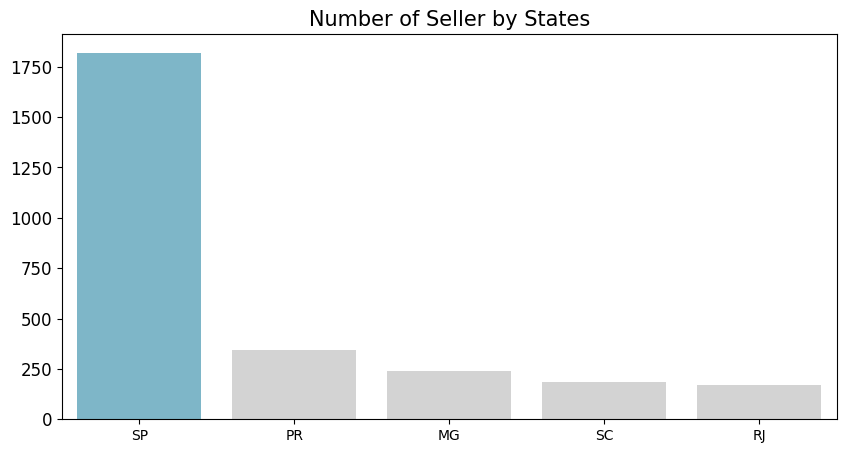

In [259]:
bystate_seller = all_df.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate_seller.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
sns.barplot(
    y="seller_count",
    x="seller_state",
    data=bystate_seller.sort_values(by="seller_count", ascending=False).head(),
    palette = colors
)
plt.title("Number of Seller by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2 : seller id apa yang memiliki total order dan total pendapatan terbanyak dan terendah?

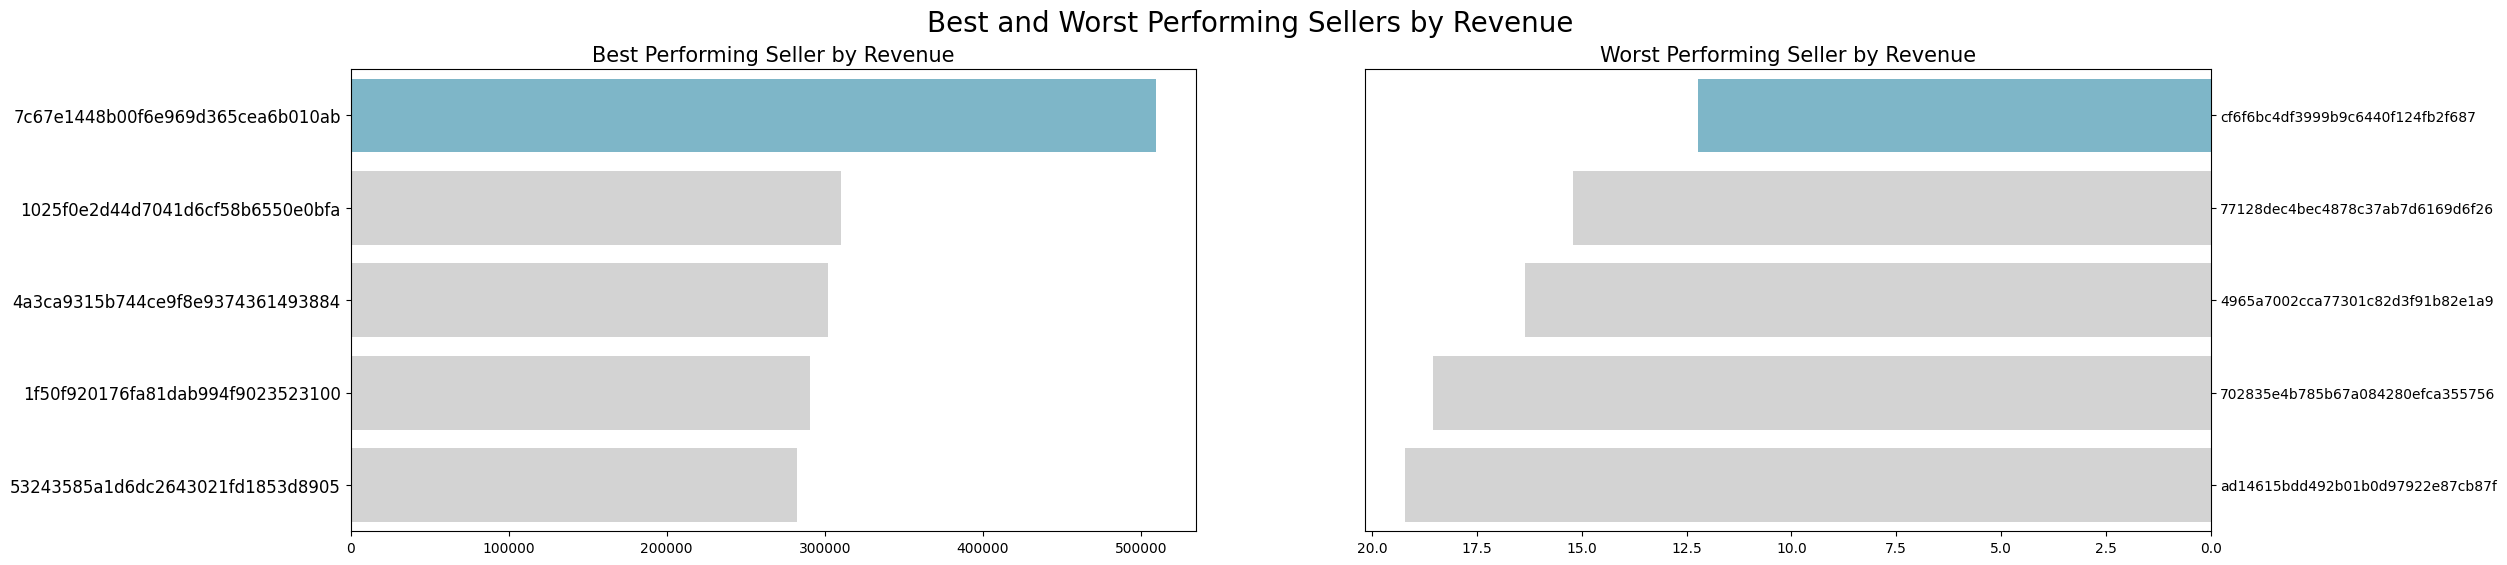

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan semua variabel telah diinisialisasi sebelumnya

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

bypayment_seller = all_df.groupby(by="seller_id").payment_value.sum().reset_index()
bypayment_seller.rename(columns={
    "payment_value": "Total Pendapatan Seller"
}, inplace=True)

# Plot pertama
sns.barplot(x="Total Pendapatan Seller", y="seller_id", data=bypayment_seller.sort_values(by="Total Pendapatan Seller", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Seller by Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)


# Plot kedua
sns.barplot(x="Total Pendapatan Seller", y="seller_id", data=bypayment_seller.sort_values(by="Total Pendapatan Seller", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Seller by Revenue", loc="center", fontsize=15)


plt.suptitle("Best and Worst Performing Sellers by Revenue", fontsize=20)
plt.show()


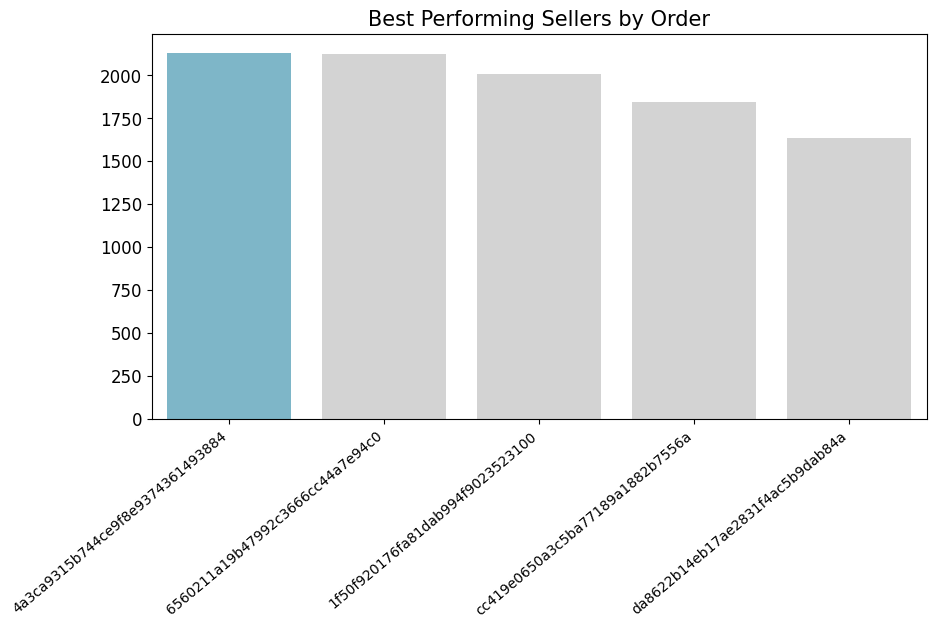

In [261]:
byorder_seller = order_customer_produk_seller.groupby(by="seller_id").order_id.count().reset_index()
byorder_seller.rename(columns={
    "order_id": "seller_count"
}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="seller_id",
    y="seller_count",
    data=byorder_seller.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors
)

plt.title("Best Performing Sellers by Order", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

# Memiringkan tulisan di sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

plt.show()


### Pertanyaan 3: bagaimana demografi pelanggan berdasarkan states atau negara bagiannya?

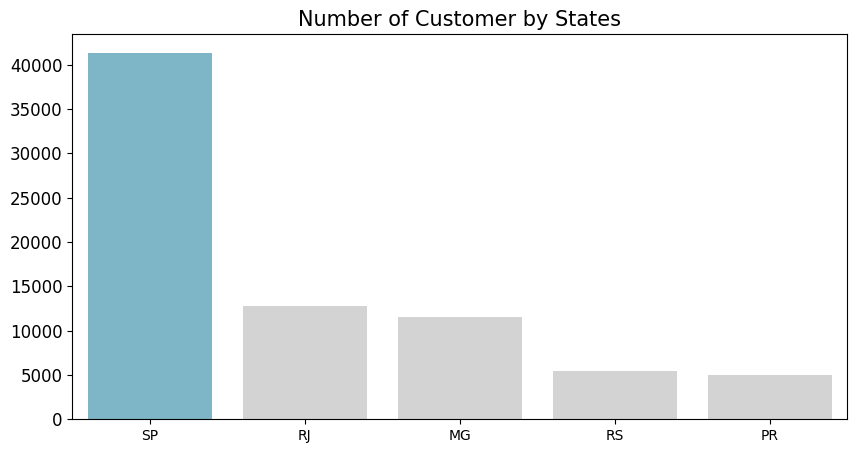

In [262]:
bystate_customer = order_customer.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_customer.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y= "customer_count",
    x= "customer_state",
    data=bystate_customer.sort_values(by="customer_count", ascending=False).head(),
    palette = colors
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: Apa produk yang memiliki total order tertinggi?



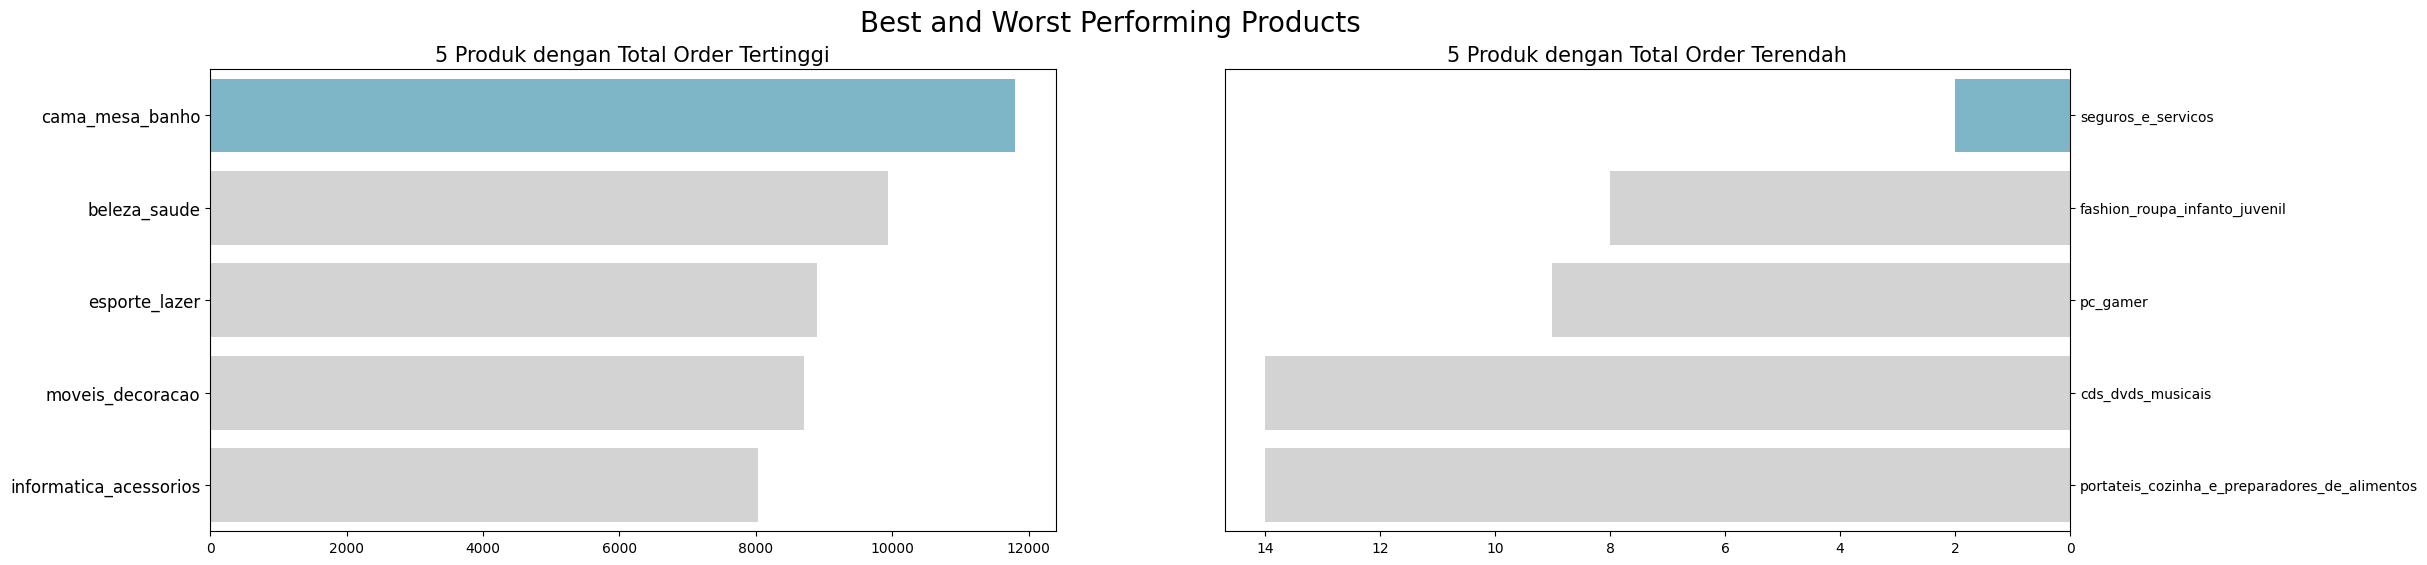

In [263]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

produk_order = order_customer_produk.groupby(by="product_category_name").order_id.count().reset_index()
produk_order.rename(columns={
     "order_id": "total order"
}, inplace=True)


# Plot pertama
sns.barplot(x="total order", y="product_category_name", data=produk_order.sort_values(by="total order", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Produk dengan Total Order Tertinggi", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)


# Plot kedua
sns.barplot(x="total order", y="product_category_name", data=produk_order.sort_values(by="total order", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Produk dengan Total Order Terendah", loc="center", fontsize=15)


plt.suptitle("Best and Worst Performing Products", fontsize=20)
plt.show()


### Pertanyaan 5: Apa customer state apa yang memiliki total order dan total pendapatan tertinggi?



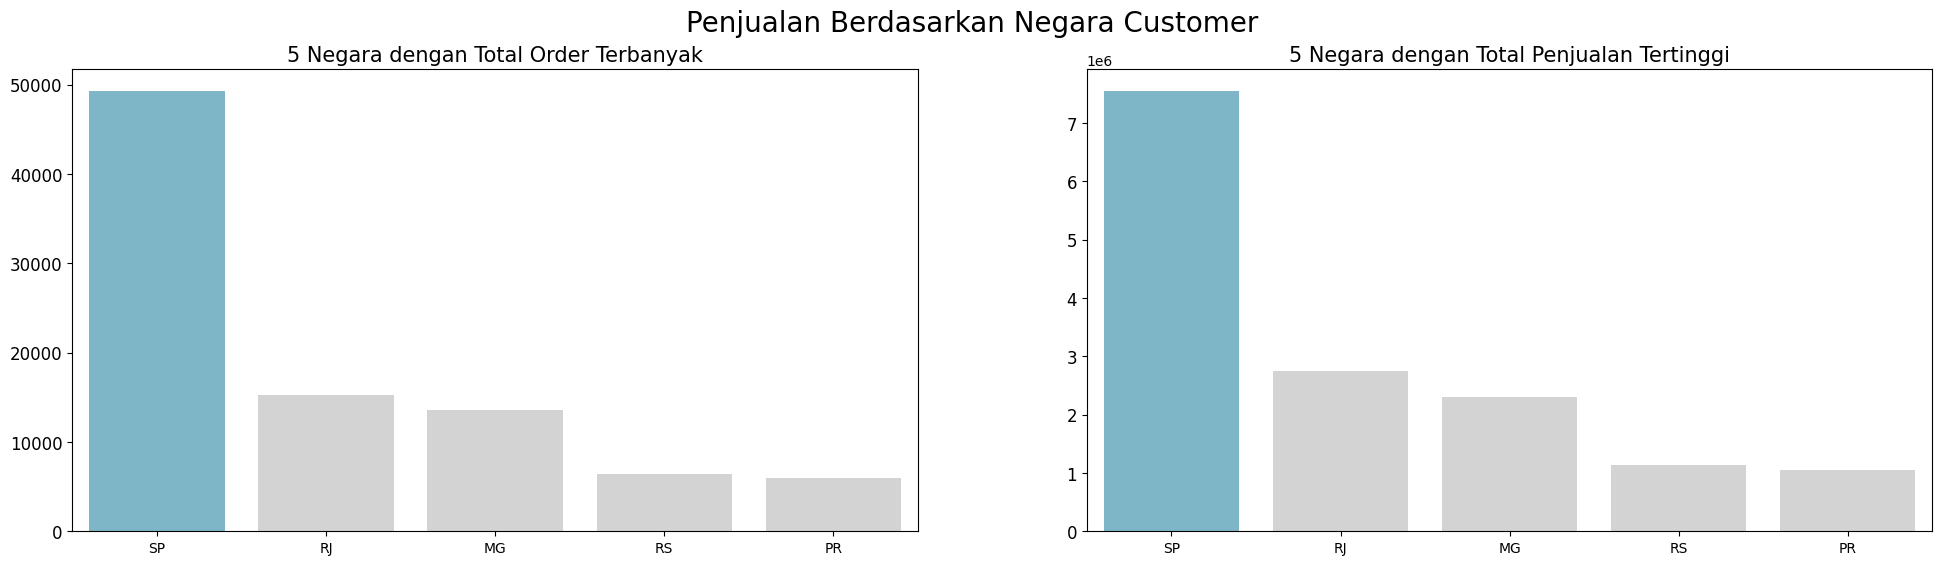

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

state_order = order_customer_produk.groupby(by=["customer_state"]).agg({
    "order_id": "count",
    "payment_value": "sum"
}).reset_index()

state_order.rename(columns={
    "order_id": "total order",
    "payment_value": "total penjualan"
}, inplace=True)

# Plot pertama
sns.barplot(y="total order", x="customer_state", data=state_order.sort_values(by="total order", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Negara dengan Total Order Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Plot kedua
sns.barplot(y="total penjualan", x="customer_state", data=state_order.sort_values(by="total penjualan", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("5 Negara dengan Total Penjualan Tertinggi", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)


plt.suptitle("Penjualan Berdasarkan Negara Customer", fontsize=20)
plt.show()


### Pertanyaan 6: Berapa jumlah setiap rating yang diberikan customer?

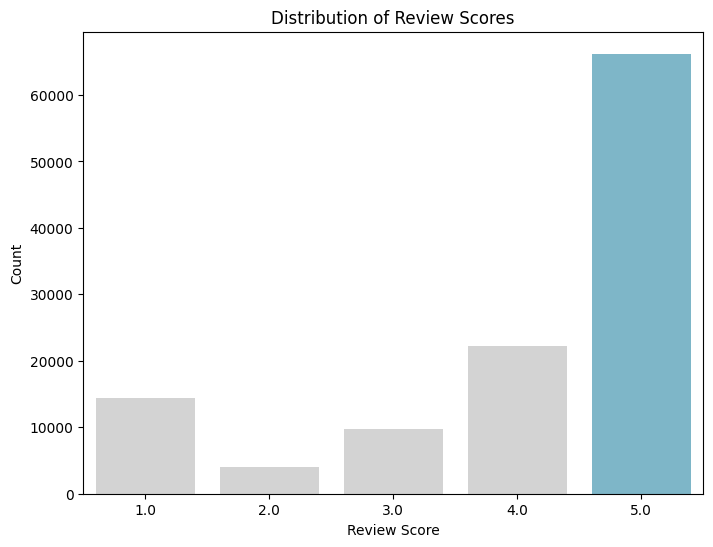

In [265]:
review_counts = all_df["review_score"].value_counts()

plt.figure(figsize=(8, 6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(x=review_counts.index, y=review_counts.values, palette=colors)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan demografi dari seller yang menjual produknya melalui Olist Store, seller paling banyak berasal dari negara SP dengan total seller sebanyak 1849
- Conclution pertanyaan 2 : Bedasarkan total order, seller id yang memiliki total order terbanyak yaitu seller id 4a3ca9315b744ce9f8e9374361493884 dengan total order sebanyak 2133. Berdasarkan total penjualan, seller id yang memikiki total pendapatan tertinggi yaitu seller id 7c67e1448b00f6e969d365cea6b010ab dengan total penjualan sejumlah 507166.91. Sedangkan seller id yang memiliki total pendapatan terendah yaitu seller id cf6f6bc4df3999b9c6440f124fb2f687 dengan total pendapatan sejumlah 12.22
- Conclution pertanyaan 3 : Berdasarkan negara customer, customer terbanyak berasal dari negara SP dengan jumlah customer sebanyak 41374, sedangkan negara dengan jumlah customer terendah adalah RR sebanyak 46
- Conclution pertanyaan 4: Berdasarkan total order dan total penjualan produk, produk yang memiliki total revenue tertinggi yaitu cama mesa banho dengan total penjualan sejumlah 1711258.08, sekaligus menjadi produk yang paling banyak diorder dengan total order sebanyak 11805. Sedangkan produk yang memiliki total revenue terendah yaitu seguros_e_servicos dengan total penjualan sejumlah 324.51, sekaligus menjadi produk yang paling sedikit diorder dengan total order sebanyak 2
- Conclution 5: Negara yang memiliki total order sekaligus total penjualan tertinggi adalah SP dengan total order sebanyak 49258 dan total penjualan sejumlah 7544659,30. Sedangkan negara yang memiliki total order sekaligus total penjualan terendah adalah RR dengan total order sebanyak 51 dan total penjualan sejumlah 12346.56
- Conlution 6 : Dari total review yang diberikan customer, customer paling banyak memberi score 5 sebanyak sebanyak 57328. Skor terendah yaitu skor 1 menempati posisi 3 yaitu sebanyak 11424